In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
df = pd.read_csv("results2.csv")
df.head()

,actual_name,predicted_name,is_correct,predicted_image_path,known_image_path,distance
0,Aaron_Peirsol,Aaron_Peirsol,True,../known_faces\Aaron_Peirsol\Aaron_Peirsol_000...,../unknown_faces\Aaron_Peirsol_0003.jpg,0.266416
1,Aaron_Peirsol,Aaron_Peirsol,True,../known_faces\Aaron_Peirsol\Aaron_Peirsol_000...,../unknown_faces\Aaron_Peirsol_0004.jpg,NaN
2,Aaron_Sorkin,Aaron_Sorkin,True,../known_faces\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,../unknown_faces\Aaron_Sorkin_0002.jpg,NaN
3,Abdel_Nasser_Assidi,Jose_Mourinho,False,../known_faces\Jose_Mourinho\Jose_Mourinho_000...,../unknown_faces\Abdel_Nasser_Assidi_0002.jpg,NaN
4,Abdoulaye_Wade,Abdoulaye_Wade,True,../known_faces\Abdoulaye_Wade\Abdoulaye_Wade_0...,../unknown_faces\Abdoulaye_Wade_0003.jpg,0.474805


C:\Users\kırmızı\AppData\Local\Temp\ipykernel_12868\2568100482.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=["#4CAF50", "#F44336", "#6E6F94"])


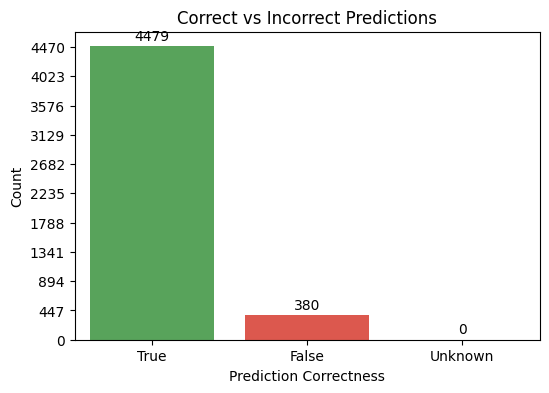

In [3]:
correct = (df['is_correct'] == True).sum()
incorrect = ((df['is_correct'] == False) & (df['predicted_name'] != "UNKNOWN")).sum()
unknown = (df['predicted_name'] == "UNKNOWN").sum()

labels = ["True", "False", "Unknown"]
values = [correct, incorrect, unknown]

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=values, palette=["#4CAF50", "#F44336", "#6E6F94"])

# set title and labels
plt.title("Correct vs Incorrect Predictions")
plt.xlabel("Prediction Correctness")
plt.ylabel("Count")

# make y-ticks accurate with values
plt.yticks(range(0, max(values) + 1, max(1, max(values)//10)))

# annotate bars with counts
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.show()

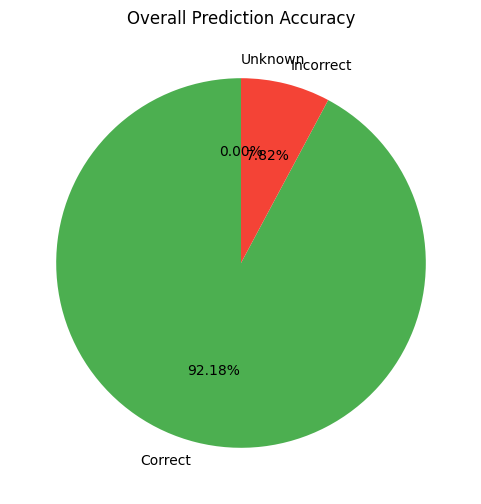

In [4]:
plt.figure(figsize=(6, 6))
plt.pie(
    [
        (df['is_correct'] == True).sum(),
        ((df['is_correct'] == False) & (df['predicted_name'] != "UNKNOWN")).sum(),
        (df['predicted_name'] == "UNKNOWN").sum()
    ],
    labels=["Correct", "Incorrect", "Unknown"],
    autopct="%1.2f%%",
    colors=["#4CAF50", "#F44336", "#6E6F94"],  # green = correct, red = incorrect, gray = unknown
    startangle=90
)
plt.title("Overall Prediction Accuracy")
plt.show()

In [5]:
accuracy_per_person = df.groupby('actual_name')['is_correct'].mean()
accuracy_per_person

actual_name
Aaron_Peirsol          1.0
Aaron_Sorkin           1.0
Abdel_Nasser_Assidi    0.0
Abdoulaye_Wade         1.0
Abdullah               1.0
                      ... 
Zhang_Ziyi             1.0
Zhu_Rongji             1.0
Zico                   1.0
Zinedine_Zidane        1.0
Zoran_Djindjic         1.0
Name: is_correct, Length: 1681, dtype: float64

In [6]:
picture_per_person_counts = df['actual_name'].value_counts()
picture_per_person_counts

actual_name
George_W_Bush        265
Colin_Powell         118
Tony_Blair            72
Donald_Rumsfeld       61
Gerhard_Schroeder     55
                    ... 
Martin_Sheen           1
Ernesto_Zedillo        1
Marwan_Barghouthi      1
Erika_Christensen      1
Jo_Dee_Messina         1
Name: count, Length: 1681, dtype: int64

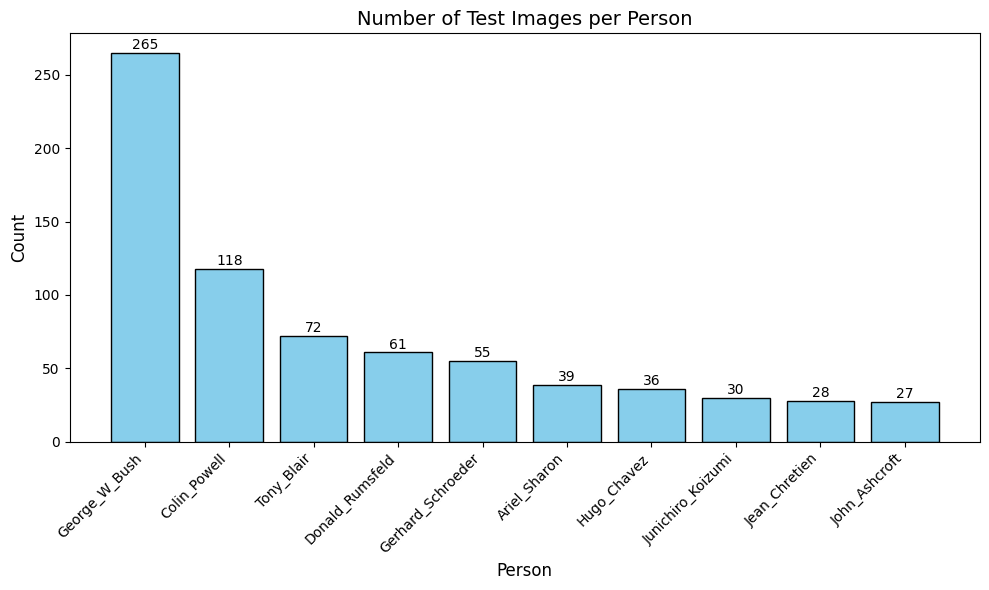

In [7]:
plt.figure(figsize=(10,6))
bars = plt.bar(
    x=picture_per_person_counts.index.values[:10],
    height=picture_per_person_counts.values[:10],
    color="skyblue", edgecolor="black"
)

# Title & labels
plt.title("Number of Test Images per Person", fontsize=14)
plt.xlabel("Person", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        height + 0.5, 
        str(int(height)), 
        ha="center", va="bottom", fontsize=10
    )

plt.tight_layout()
plt.show()

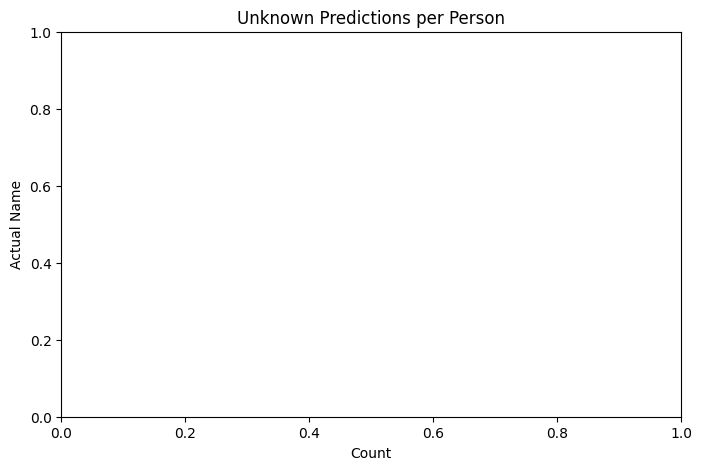

In [8]:
unknown_counts = df[df["predicted_name"] == "UNKNOWN"]["actual_name"].value_counts()[:15]

plt.figure(figsize=(8,5))
sns.barplot(x=unknown_counts.values, y=unknown_counts.index, palette="coolwarm")
plt.title("Unknown Predictions per Person")
plt.xlabel("Count")
plt.ylabel("Actual Name")
plt.show()

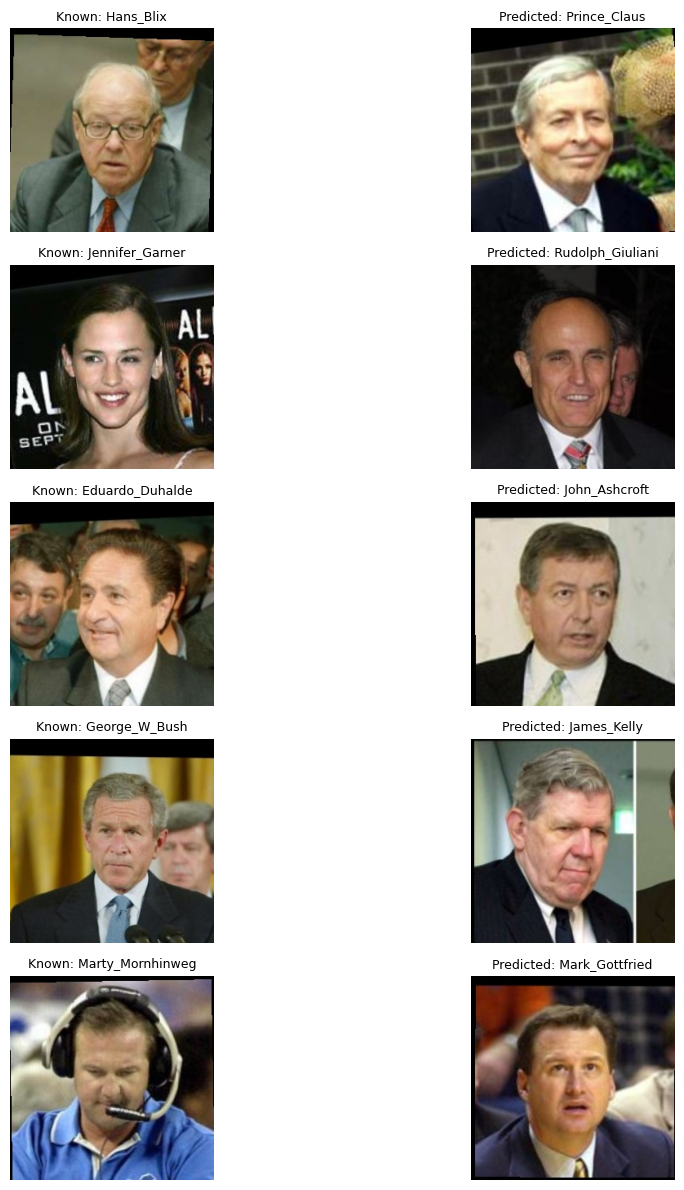

In [9]:
num = 5
sample = df[(df["is_correct"] == False) & (df['predicted_name'] != "UNKNOWN")].sample(num)

plt.figure(figsize=(12, 12))

for i, row in enumerate(sample.itertuples(), 1):
    # Left: known (ground truth)
    plt.subplot(num, 2, 2*i - 1)
    img_known = mpimg.imread(row.known_image_path)
    plt.imshow(img_known)
    plt.title(f"Known: {row.actual_name}", fontsize=9)
    plt.axis("off")

    # Right: predicted
    plt.subplot(num, 2, 2*i)
    img_pred = mpimg.imread(row.predicted_image_path)
    plt.imshow(img_pred)
    plt.title(f"Predicted: {row.predicted_name}", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

C:\Users\kırmızı\AppData\Local\Temp\ipykernel_12868\2189169085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incorrect.values, y=incorrect.index, palette="magma")


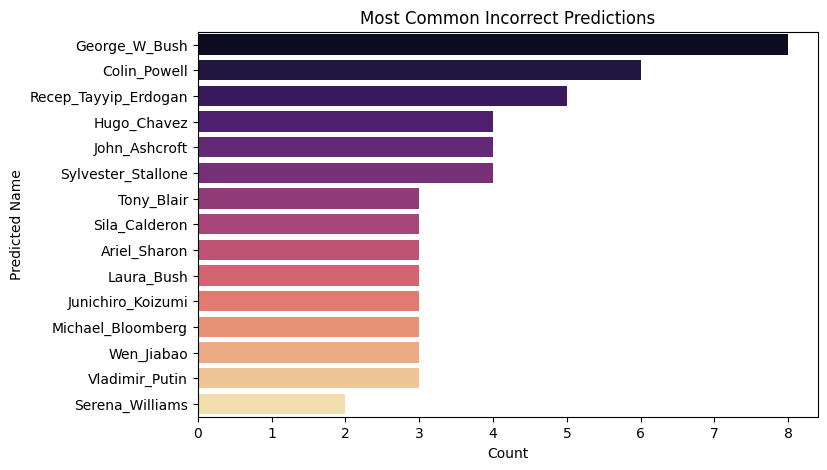

In [10]:
incorrect = df[(df["is_correct"] == False) & (df['predicted_name'] != "UNKNOWN")]["predicted_name"].value_counts()[:15]

plt.figure(figsize=(8,5))
sns.barplot(x=incorrect.values, y=incorrect.index, palette="magma")
plt.title("Most Common Incorrect Predictions")
plt.xlabel("Count")
plt.ylabel("Predicted Name")
plt.show()